In [3]:
import pandas as pd

df = pd.read_excel("data_kuesioner.xlsx")
df.head()

,Partisipan,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,1,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
1,2,S,S,S,S,S,S,S,S,CS,S,S,S,S,S,S,S,S
2,3,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS
3,4,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
4,5,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df = pd.read_excel("data_kuesioner.xlsx")
df.head()

,Partisipan,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,1,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
1,2,S,S,S,S,S,S,S,S,CS,S,S,S,S,S,S,S,S
2,3,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS
3,4,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
4,5,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS


In [3]:
pertanyaan = df.columns[1:]

df_long = df.melt(
    id_vars=["Partisipan"],
    value_vars=pertanyaan,
    var_name="Pertanyaan",
    value_name="Jawaban"
)

skor_map = {
    "STS": 1,
    "TS": 2,
    "N": 3,
    "CS": 3,
    "S": 4,
    "SS": 5
}

df_long["Skor"] = df_long["Jawaban"].map(skor_map)

df_long.head()


,Partisipan,Pertanyaan,Jawaban,Skor
0,1,Q1,S,4.0
1,2,Q1,S,4.0
2,3,Q1,CS,3.0
3,4,Q1,S,4.0
4,5,Q1,CS,3.0


In [4]:
print("Jumlah Responden:", df["Partisipan"].nunique())
print("Jumlah Pertanyaan:", len(pertanyaan))
print("Rata-rata Skor Keseluruhan:", round(df_long["Skor"].mean(), 2))


Jumlah Responden: 113
Jumlah Pertanyaan: 17
Rata-rata Skor Keseluruhan: 3.84


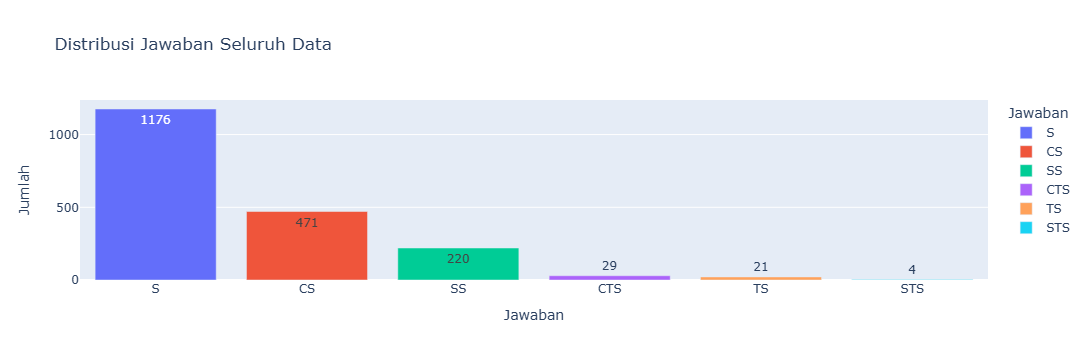

In [5]:
distribusi_total = df_long["Jawaban"].value_counts().reset_index()
distribusi_total.columns = ["Jawaban", "Jumlah"]

fig1 = px.bar(
    distribusi_total,
    x="Jawaban",
    y="Jumlah",
    text="Jumlah",
    color="Jawaban",
    title="Distribusi Jawaban Seluruh Data"
)

fig1.show()


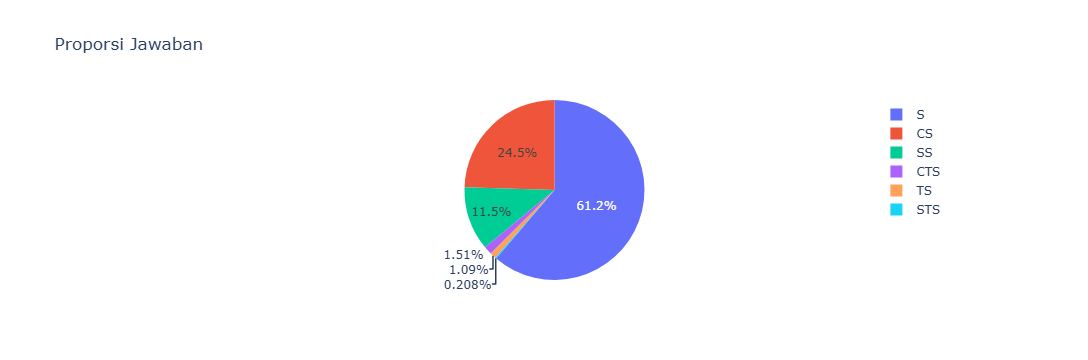

In [6]:
fig2 = px.pie(
    distribusi_total,
    names="Jawaban",
    values="Jumlah",
    title="Proporsi Jawaban"
)

fig2.show()


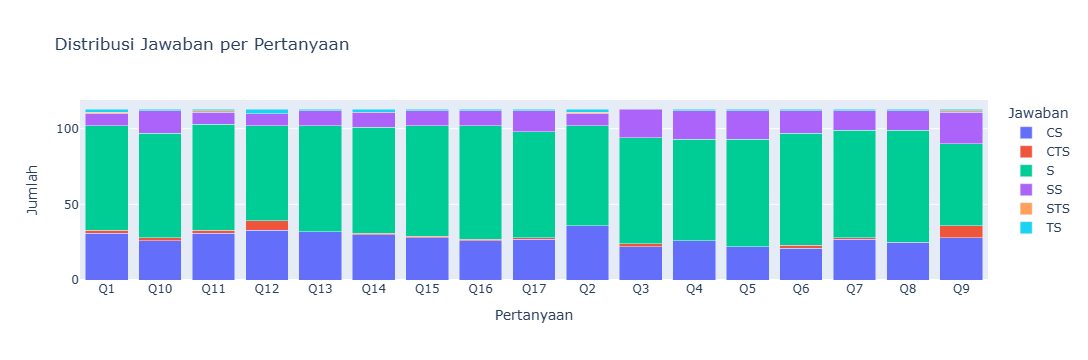

In [7]:
distribusi_per_q = (
    df_long.groupby(["Pertanyaan", "Jawaban"])
    .size()
    .reset_index(name="Jumlah")
)

fig3 = px.bar(
    distribusi_per_q,
    x="Pertanyaan",
    y="Jumlah",
    color="Jawaban",
    barmode="stack",
    title="Distribusi Jawaban per Pertanyaan"
)

fig3.show()


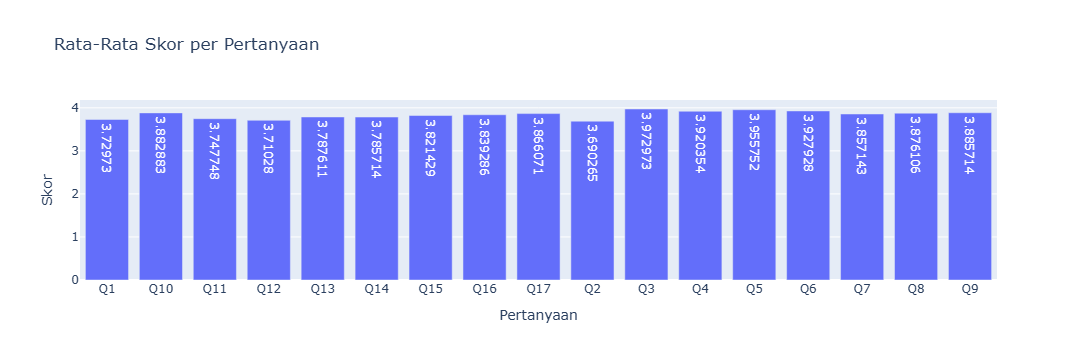

In [8]:
rata_rata = (
    df_long.groupby("Pertanyaan")["Skor"]
    .mean()
    .reset_index()
)

fig4 = px.bar(
    rata_rata,
    x="Pertanyaan",
    y="Skor",
    text_auto=True,
    title="Rata-Rata Skor per Pertanyaan"
)

fig4.show()
